In [4]:
import nengo
import pytry
import numpy as np

########################
# transform in meso_sensitivity recurrence ensemble = 1, 
# transform in cue_salience recurrent = 0.9
########################


model = nengo.Network()
#n_presentations = 3
#period=1.0
#off_time=0.4

period=0.75
off_time=0.65
n_presentations = 6

cue_period=1.0
cue_off_time=0.9
n_cue_presentations = 4

with model:
    def drug_func(t):
        if t%period < off_time:
            return 0
        else:
            return 1
    drug_intake = nengo.Node(drug_func)
    p_drug_intake = nengo.Probe(drug_intake)
    DA_activation = nengo.Ensemble(n_neurons = 1000, dimensions=1) # neuroloical representation of drug
    nengo.Connection(drug_intake, DA_activation)

    meso_sensitivity = nengo.Ensemble(n_neurons=1000, dimensions=1)
    nengo.Connection(DA_activation, meso_sensitivity, transform=0.1)   
    nengo.Connection(meso_sensitivity, meso_sensitivity, synapse=0.1, transform=0.9)  
    p_meso = nengo.Probe(meso_sensitivity, synapse = 0.01)
    
        ##### new #####
    def cue_func(t):
        if t%cue_period < cue_off_time:
            return 0
        else:
            return 1  
    stim = nengo.Node(cue_func)
    p_stim_presence = nengo.Probe(stim)
    
    cue_presence = nengo.Ensemble(n_neurons=1000, dimensions=1)
    #p_cue = nengo.Probe(cue_presence)
    nengo.Connection(stim, cue_presence)

    cue_salience = nengo.Ensemble(n_neurons=1000, dimensions=1)
    p_cue_salience = nengo.Probe(cue_salience, synapse = 0.01)

    
    nengo.Connection(cue_presence, cue_salience, transform=0.1)   
    nengo.Connection(cue_salience, cue_salience, synapse=0.1, transform=0.9)  
            
    def structural_func(t, x):
        drug = x[0]
        cue = x[1]
        if drug < 0:
            drug=0
        if cue < 0:
            cue = 0
        # map from (0,1) to (1, 10)
        size = np.interp(cue, [0, 1], [1.0, 10.0])
        return size * drug
    
    structural_mod = nengo.Node(structural_func, size_in=2, size_out=1)
    wanting = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(meso_sensitivity, structural_mod[0])
    nengo.Connection(cue_salience, structural_mod[1])
    nengo.Connection(structural_mod, wanting)

    p_wanting = nengo.Probe(wanting, synapse = 0.01)
            
            
sim = nengo.Simulator(model)
sim.run(10)

################################## model 2 #####################################################
model2 = nengo.Network()
with model2:
    def drug_func_2(t):
        if t%period < off_time:
            return 0
        else:
            return 1
    drug_intake_2 = nengo.Node(drug_func_2)
    p_drug_intake_2 = nengo.Probe(drug_intake_2)
    DA_activation_2 = nengo.Ensemble(n_neurons = 1000, dimensions=1) # neuroloical representation of drug
    nengo.Connection(drug_intake_2, DA_activation_2)

    meso_sensitivity_2 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    nengo.Connection(DA_activation_2, meso_sensitivity_2, transform=0.1)   
    nengo.Connection(meso_sensitivity_2, meso_sensitivity_2, synapse=0.1, transform=0.9)  
    p_meso = nengo.Probe(meso_sensitivity_2, synapse = 0.01)
    
        ##### new #####
    def cue_func_2(t):
        if t%cue_period < cue_off_time:
            return 0
        else:
            return 1           
    stim_presence_2 = nengo.Node(cue_func_2)
    p_stim_presence_2 = nengo.Probe(stim_presence_2)
    cue_presence_2 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    #p_cue = nengo.Probe(cue_presence)
    nengo.Connection(stim_presence_2, cue_presence_2)

    cue_salience_2 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    p_cue_salience_2 = nengo.Probe(cue_salience_2, synapse=0.01)
    
    nengo.Connection(cue_presence_2, cue_salience_2, transform=0.1)   
    nengo.Connection(cue_salience_2, cue_salience_2, synapse=0.1, transform=0.9)  
            
    def structural_func_2(t, x):
        drug_2 = x[0]
        cue_2 = x[1]
        if drug_2<0:
            drug_2=0
        if cue_2<0:
            cue_2=0
        # map from (0,1) to (1, 10)
        size_2 = np.interp(drug_2, [0, 1], [1.0, 10.0])
        return size_2 * cue_2
    
    structural_mod_2 = nengo.Node(structural_func_2, size_in=2, size_out=1)
    wanting_2 = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(meso_sensitivity_2, structural_mod_2[0])
    nengo.Connection(cue_salience_2, structural_mod_2[1])
    nengo.Connection(structural_mod_2, wanting_2)

    p_wanting_2 = nengo.Probe(wanting_2, synapse = 0.01)
            
            
sim_2 = nengo.Simulator(model2)
sim_2.run(10)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

Text(0, 0.5, 'wanting')

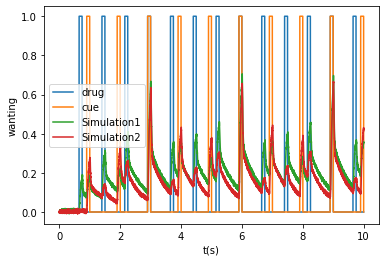

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sim.trange(), sim.data[p_drug_intake], label='drug')
plt.plot(sim.trange(), sim.data[p_stim_presence], label='cue')
#plt.plot(sim.trange(), sim.data[p_cue], label='cue1')
plt.plot(sim.trange(), sim.data[p_wanting], label='Simulation1')
#plt.plot(sim_2.trange(), sim_2.data[p_cue_2], label='cue2')
plt.plot(sim_2.trange(), sim_2.data[p_wanting_2], label='Simulation2')
plt.xlabel('t(s)')
plt.legend();
plt.ylabel('wanting')


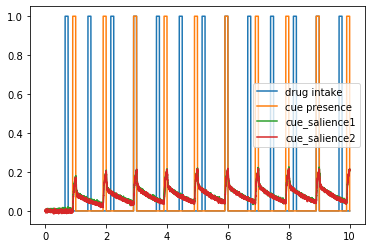

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sim.trange(), sim.data[p_drug_intake], label='drug intake')
plt.plot(sim.trange(), sim.data[p_stim_presence], label='cue presence')
plt.plot(sim.trange(), sim.data[p_cue_salience], label='cue_salience1')
#plt.plot(sim.trange(), sim.data[p_wanting], label='wanting')
plt.plot(sim_2.trange(), sim_2.data[p_cue_salience_2], label='cue_salience2')
#plt.plot(sim_2.trange(), sim_2.data[p_wanting_2], label='wanting2')

plt.legend();

In [1]:
import nengo
import pytry
import numpy as np

########################
# adjusted transform in meso_sensitivity ensemble to 0.9
# added the non-linear growth of recurrence in meso_sensitivity
########################
model3 = nengo.Network(seed=5)
period_3=0.75
off_time_3=0.65
n_presentations_3 = 6

cue_period_3=1.0
cue_off_time_3=0.9
n_cue_presentations_3 = 4

with model3:
    def drug_func_3(t):
        if t%period_3 < off_time_3:
            return 0
        else:
            return 1
    drug_intake_3 = nengo.Node(drug_func_3)
    p_drug_intake_3 = nengo.Probe(drug_intake_3)
    DA_activation_3 = nengo.Ensemble(n_neurons = 1000, dimensions=1) # neuroloical representation of drug
    nengo.Connection(drug_intake_3, DA_activation_3)

    ##### new #####
    def meso_recurr_func_3(x):
        DA = x[0]
        stored_value = x[1]
        if stored_value < 0:
            stored_value = 0
        if DA < 0.1:
            return stored_value - 0.01
        else:
            return stored_value + 0.2
    meso_sensitivity_3 = nengo.Ensemble(n_neurons=1000, dimensions=2)   
    nengo.Connection(DA_activation_3, meso_sensitivity_3[0], transform=0.1)

    nengo.Connection(meso_sensitivity_3, meso_sensitivity_3[1], function=meso_recurr_func_3,
                     synapse =0.1, transform=0.9)
    
        ##### new #####
    def cue_func_3(t):
        if t%cue_period_3 < cue_off_time_3:
            return 0
        else:
            return 1           
    stim_presence_3 = nengo.Node(cue_func_3)
    p_stim_presence_3 = nengo.Probe(stim_presence_3)
    cue_presence_3 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    #p_cue = nengo.Probe(cue_presence)
    nengo.Connection(stim_presence_3, cue_presence_3)

    cue_salience_3 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    
    nengo.Connection(cue_presence_3, cue_salience_3, transform=0.1)   
    nengo.Connection(cue_salience_3, cue_salience_3, synapse=0.1, transform=0.9)  
    p_cue_3 = nengo.Probe(cue_salience_3, synapse=0.01)

    def structural_func_3(t, x):
        drug = x[0]
        cue = x[1]
        if drug < 0:
            drug=0
        if cue < 0:
            cue = 0
        # map from (0,1) to (1, 10)
        size = np.interp(cue, [0, 1], [1.0, 10.0])
        return size * drug
    
    structural_mod_3 = nengo.Node(structural_func_3, size_in=2, size_out=1)
    wanting_3 = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(meso_sensitivity_3[1], structural_mod_3[0])
    nengo.Connection(cue_salience_3, structural_mod_3[1])
    nengo.Connection(structural_mod_3, wanting_3)

    p_wanting_3 = nengo.Probe(wanting_3, synapse = 0.01)
            
            
sim_3 = nengo.Simulator(model3)
sim_3.run(10)



############################### model 4 ##############################################
model4 = nengo.Network(seed=5)
with model4:
    def drug_func_4(t):
        if t%period_3 < off_time_3:
            return 0
        else:
            return 1
    drug_intake_4 = nengo.Node(drug_func_4)
    p_drug_intake_4 = nengo.Probe(drug_intake_4)
    DA_activation_4 = nengo.Ensemble(n_neurons = 1000, dimensions=1) # neuroloical representation of drug
    nengo.Connection(drug_intake_4, DA_activation_4)

    def meso_recurr_func_4(x):
        DA = x[0]
        stored_value = x[1]
        if stored_value < 0:
            stored_value = 0
        if DA < 0.1:
            return stored_value - 0.01
        else:
            return stored_value + 0.2
    meso_sensitivity_4 = nengo.Ensemble(n_neurons=1000, dimensions=2)   
    nengo.Connection(DA_activation_4, meso_sensitivity_4[0], transform=0.1)
    nengo.Connection(meso_sensitivity_4, meso_sensitivity_4[1], function=meso_recurr_func_4,
                     synapse =0.1, transform=0.9)  
    p_meso = nengo.Probe(meso_sensitivity_4, synapse = 0.01)
    
        ##### new #####
    def cue_func_4(t):
        if t%cue_period_3 < cue_off_time_3:
            return 0
        else:
            return 1           
    stim_presence_4 = nengo.Node(cue_func_4)
    p_stim_presence_4 = nengo.Probe(stim_presence_4)
    
    cue_presence_4 = nengo.Ensemble(n_neurons = 1000, dimensions=1)
    nengo.Connection(stim_presence_4, cue_presence_4)
    cue_salience_4 = nengo.Ensemble(n_neurons=1000, dimensions=1)
    p_cue_4 = nengo.Probe(cue_salience_4, synapse=0.01)
    
    nengo.Connection(cue_presence_4, cue_salience_4, transform=0.1)   
    nengo.Connection(cue_salience_4, cue_salience_4, synapse=0.1, transform=0.9)  
            
    def structural_func_4(t, x):
        drug_4 = x[0]
        cue_4 = x[1]
        if drug_4<0:
            drug_4=0
        if cue_4<0:
            cue_4=0
        # map from (0,1) to (1, 10)
        size_4 = np.interp(drug_4, [0, 1], [1.0, 10.0])
        return size_4 * cue_4
    
    structural_mod_4 = nengo.Node(structural_func_4, size_in=2, size_out=1)
    wanting_4 = nengo.Ensemble(n_neurons=1000, dimensions=1)

    nengo.Connection(meso_sensitivity_4[1], structural_mod_4[0])
    nengo.Connection(cue_salience_4, structural_mod_4[1])
    nengo.Connection(structural_mod_4, wanting_4)

    p_wanting_4 = nengo.Probe(wanting_4, synapse = 0.01)
            
            
sim_4 = nengo.Simulator(model4)
sim_4.run(10)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

Text(0, 0.5, 'neural activation level')

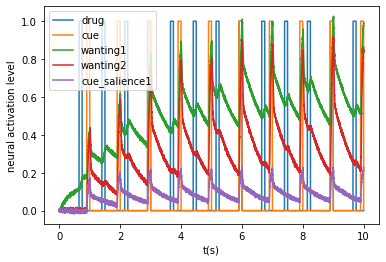

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sim_3.trange(), sim_3.data[p_drug_intake_3], label='drug')
plt.plot(sim_3.trange(), sim_3.data[p_stim_presence_3], label='cue')
plt.plot(sim_3.trange(), sim_3.data[p_wanting_3], label='wanting1')
plt.plot(sim_4.trange(), sim_4.data[p_wanting_4], label='wanting2')
plt.plot(sim_3.trange(), sim_3.data[p_cue_3], label='cue_salience1')
plt.legend()
plt.xlabel('t(s)')
plt.ylabel('neural activation level')


